In [1]:
import torch
import matplotlib
import matplotlib.pyplot as plt
import math
from IPython import display
matplotlib.style.use('ggplot')
torch.set_grad_enabled(False)

from Utilities import generate_disc_set, compute_nb_errors
from Loss import Loss, MSE
from Module import DenseLayer, ReLU, Sequential, Tanh

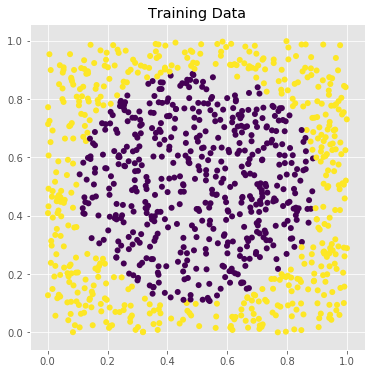

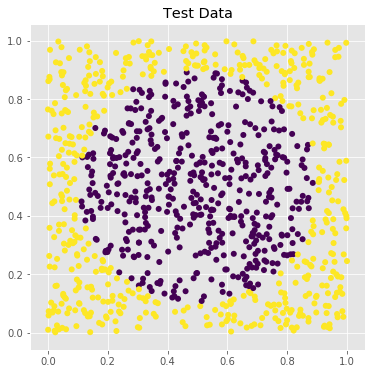

In [2]:
train_size = 1000
test_size = 1000

train_data, train_target = generate_disc_set(train_size)
test_data, test_target = generate_disc_set(test_size)

plt.figure(figsize=(6,6))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_target[:, 0].numpy(), edgecolors='none')
plt.title('Training Data')
plt.show()


plt.figure(figsize=(6,6))
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_target[:, 0].numpy(), edgecolors='none')
plt.title('Test Data')
plt.show()

In [3]:
net_loss = MSE()

net = Sequential()
net.add(DenseLayer(2, 25))
net.add(ReLU())
net.add(DenseLayer(25, 25))
net.add(ReLU())
net.add(DenseLayer(25, 2))
net.add(ReLU())

print(net)

Linear 2 -> 25
ReLU
Linear 25 -> 25
ReLU
Linear 25 -> 2
ReLU



In [4]:
def sgd(x, dx, config):
    for cur_layer_x, cur_layer_dx in zip(x, dx):
        for cur_x, cur_dx in zip(cur_layer_x, cur_layer_dx):

            cur_old_grad = config['learning_rate'] * cur_dx

            if cur_old_grad.shape[0] == 1:
                cur_x = cur_x.reshape(cur_old_grad.shape)

            cur_x.add_(-cur_old_grad)

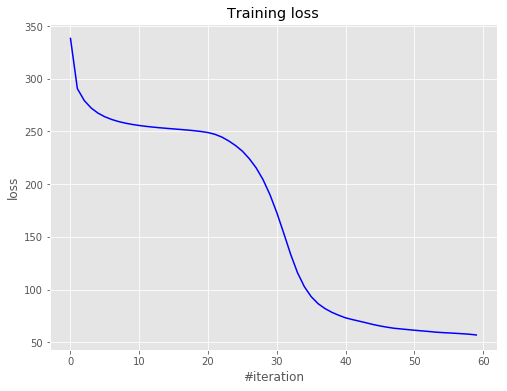

Current loss: 56.892941


In [5]:
optimizer_config = {'learning_rate': 0.005}
n_epoch = 60
batch_size = 64
loss_history = []

for i in range(n_epoch):
    loss = 0
    for i in range(0, 1000):
        net.zero_grad_params()

        # Forward
        pred = net.forward(train_data[i])
        loss += net_loss.forward(pred, train_target[i])

        # Backward
        lg = net_loss.backward(pred, train_target[i])
        net.backward(train_data[i], lg)

        # Update weights
        sgd(net.get_params(),
            net.get_grad_params(),
            optimizer_config)
    loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)

In [6]:
train_res = []
for i in range(0, 1000):
    train_res.append(net.forward(train_data[i]).view(1, -1))
train_res = torch.cat(train_res, 0)
print("Number of errors on a train set: " + str(compute_nb_errors(train_res, train_target)))
train_res = train_res.max(1).indices
train_res[train_res != train_target.max(1).indices] = 2

Number of errors on a train set: 31


In [7]:
test_res = []
for i in range(0, 1000):
    test_res.append(net.forward(test_data[i]).view(1, -1))
test_res = torch.cat(test_res, 0)
print("Number of errors on a test set: " + str(compute_nb_errors(test_res, test_target)))
test_res = test_res.max(1).indices
test_res[test_res != test_target.max(1).indices] = 2

Number of errors on a test set: 46


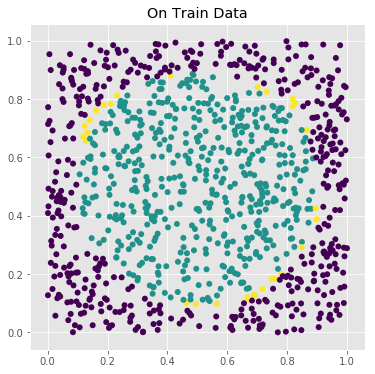

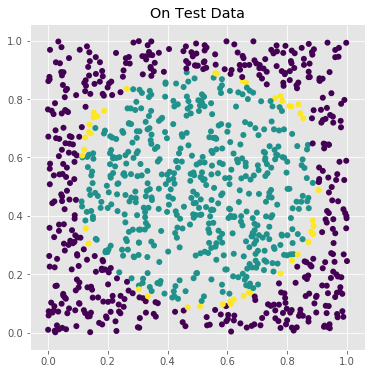

In [8]:
plt.figure(figsize=(6, 6))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_res, edgecolors="none")
plt.title('On Train Data')
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_res, edgecolors="none")
plt.title('On Test Data')
plt.show()